<a href="https://colab.research.google.com/github/DeepLearningSaeid/New-Type-of-Deep-Learning/blob/master/SWAG_Exp_3_MNIST_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# import os
# os.environ['KERAS_BACKEND'] = 'tensorflow'
############################################################################
import timeit
from keras.models import Model,Sequential
from keras.layers import Input, Embedding, LSTM, Dense,concatenate,  Dropout, Flatten, Conv2D, MaxPool2D, Activation,MaxPooling2D
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.datasets import mnist
import tensorflow as tf
from IPython.display import Image
from tensorflow.keras.optimizers import Adam
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
############################################################################


numpy.random.seed(7)

In [2]:
#Creates plot for loss and trainning functions
def plot_(history):
    training_loss1 = history.history['loss']
    test_loss1 = history.history['val_loss']
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, 'r--')
    plt.plot(epoch_count, test_loss1, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show();

In [3]:

############################################################################
def X_1(x):
    return (K.pow(x,1))
get_custom_objects().update({'X_1': Activation(X_1)})
############################################################################
def X_2(x):
    return (K.pow(x,2))/2
get_custom_objects().update({'X_2': Activation(X_2)})
############################################################################
def X_3(x):
    return (K.pow(x,3))/6
get_custom_objects().update({'X_3': Activation(X_3)})
############################################################################
def X_4(x):
    return (K.pow(x,4))/24
get_custom_objects().update({'X_4': Activation(X_4)})
############################################################################
def X_6(x):
    return (K.pow(x,6))/720
get_custom_objects().update({'X_6': Activation(X_6)})
###############################################################################
def X_5(x):
    return (K.pow(x,5))/120
get_custom_objects().update({'X_5': Activation(X_5)})
###############################################################################
def X_8(x):
    return (K.pow(x,8))/40320
get_custom_objects().update({'X_8': Activation(X_8)})
###############################################################################
def X_7(x):
    return (K.pow(x,7))/5040
get_custom_objects().update({'X_7': Activation(X_7)})
###############################################################################


In [4]:

batch_size = 128
num_classes = 10
epochs = 4

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train+10
x_test = x_test+10

x_train /= 300
x_test /= 300
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

number_train=60000 
number_test=10000

x_train=x_train[0:number_train,:]
x_test=x_test[0:number_test,:]

y_train=y_train[0:number_train]
y_test=y_test[0:number_test]

11490434/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 10)                10250     
                                                                 
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/4
469/469 [==============================] - 26s 53ms/step - loss: 0.0106 - accuracy: 0.9295 - val_loss: 0.0072 - val_accuracy: 0.9533
Epoch 2/4
469/469 [==============================] - 17s 37ms/step - loss: 0.0050 - accuracy: 0.9678 - val_loss: 0.0043 - val_accuracy: 0.9720
Epoch 3/4
469/469 [==============================] - 17s 37ms/step - loss: 0.0036 - accuracy: 0.9772 - val_loss: 0.0037 - val_accuracy: 0.9771
Epoch 4/4
469/469 [==============================] - 17s 37ms/step - loss: 0.0030 - accuracy: 0.9811 - val_loss: 0.0037 - val_accuracy: 0.9766
78.706085271
Test loss: 0.0036574131809175014
Test accuracy: 0.9765999913215637


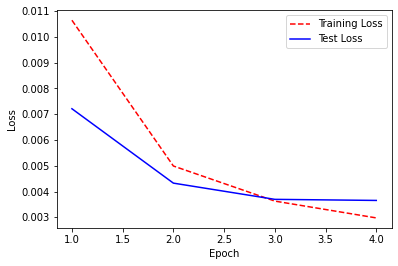

In [5]:
num_classes = 10

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(784,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
optimizer =Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['accuracy'])
start = timeit.default_timer()
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
end = timeit.default_timer()
print(end-start)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plot_(history)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 500)          392500      ['input_1[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 500)          392500      ['input_1[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 500)          392500      ['input_1[0][0]']                
                                                                                              

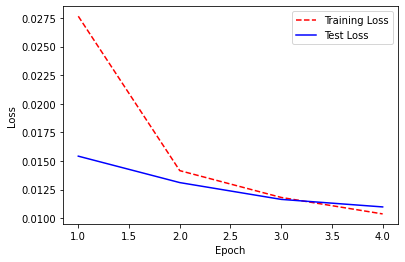

In [6]:

hidden_dimention=500
model = Sequential()
in_ = Input(shape=(784,))


# this is a logistic regression in Keras
############################################################
Layer_1_Act_X_1=Dense(hidden_dimention, activation='X_1')(in_)
################################################################
Layer_1_Act_X_2=Dense(hidden_dimention, activation='X_2')(in_)
###############################################################
Layer_1_Act_X_3=Dense(hidden_dimention, activation='X_3')(in_)
###############################################################
Concatenate_All_Layer = concatenate([in_,Layer_1_Act_X_1,Layer_1_Act_X_2,Layer_1_Act_X_3])

Out_Put=Dense(10, activation='linear')(Concatenate_All_Layer)
model = Model(in_ , Out_Put)
model.summary()

optimizer =Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['accuracy'])
start = timeit.default_timer()
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
end = timeit.default_timer()
print(end-start)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plot_(history)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_16 (Dense)               (None, 500)          392500      ['input_3[0][0]']                
                                                                                                  
 dense_17 (Dense)               (None, 500)          392500      ['input_3[0][0]']                
                                                                                                  
 dense_18 (Dense)               (None, 500)          392500      ['input_3[0][0]']                
                                                                                            

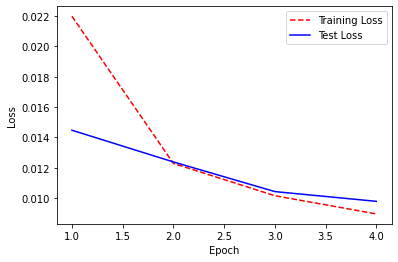

In [8]:

hidden_dimention=500
model = Sequential()

in_ = Input(shape=(784,))
Layer_1_Act_X_1=Dense(hidden_dimention, activation='X_1')(in_)
################################################################
Layer_1_Act_X_2=Dense(hidden_dimention, activation='X_2')(in_)
###############################################################
Layer_1_Act_X_3=Dense(hidden_dimention, activation='X_3')(in_)
###############################################################
Layer_1_Act_X_4=Dense(hidden_dimention, activation='X_4')(in_)
###############################################################
Layer_1_Act_X_5=Dense(hidden_dimention, activation='X_5')(in_)
###############################################################
Layer_1_Act_X_6=Dense(hidden_dimention, activation='X_6')(in_)
###############################################################
Layer_1_Act_X_7=Dense(hidden_dimention, activation='X_7')(in_)
###############################################################
Layer_1_Act_X_8=Dense(hidden_dimention, activation='X_8')(in_)
###############################################################
Concatenate_First_Layer = concatenate([Layer_1_Act_X_1,Layer_1_Act_X_2,Layer_1_Act_X_3,Layer_1_Act_X_4,Layer_1_Act_X_5,Layer_1_Act_X_6,Layer_1_Act_X_7,Layer_1_Act_X_8])

Out_put=Dense(10, activation='linear')(Concatenate_First_Layer)
model = Model(in_ , Out_put)
model.summary()

optimizer =Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['accuracy'])
# Image(filename='model_2_layers.png')

start = timeit.default_timer()
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
end = timeit.default_timer()
print(end-start)


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plot_(history)


In [10]:
# hidden_dimention=500
# model = Sequential()

# in_ = Input(shape=(784,))

# Layer_1_Act_X_1=Dense(hidden_dimention, activation='X_1')(in_)
# ################################################################
# Layer_1_Act_X_2=Dense(hidden_dimention,  activation='X_2')(in_)
# ###############################################################
# Layer_1_Act_X_3=Dense(hidden_dimention,  activation='X_3')(in_)
# ###############################################################
# Concatenate_First_Layer = concatenate([Layer_1_Act_X_1,Layer_1_Act_X_2,Layer_1_Act_X_3])
# ################################################################
# Layer_2_Act_X_2=Dense(hidden_dimention, activation='X_2')(Concatenate_First_Layer)
# Layer_3_Act_X_2=Dense(hidden_dimention, activation='X_2')(Layer_2_Act_X_2)
# Layer_4_Act_X_2=Dense(hidden_dimention, activation='X_2')(Layer_3_Act_X_2)
# Layer_5_Act_X_2=Dense(hidden_dimention, activation='X_2')(Layer_4_Act_X_2)
# Layer_6_Act_X_2=Dense(hidden_dimention, activation='X_2')(Layer_5_Act_X_2)
# Layer_8_Act_X_2=Dense(hidden_dimention, activation='X_2')(Layer_6_Act_X_2)

# Concatenate_All_Layer = concatenate([in_,Layer_1_Act_X_1,Layer_1_Act_X_2,Layer_1_Act_X_3,Layer_2_Act_X_2,Layer_3_Act_X_2])


# Out_put=Dense(10, activation='linear')(Concatenate_All_Layer)

# model = Model(in_ , Out_put)

# model.summary()

# optimizer =Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# model.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['accuracy'])

# start = timeit.default_timer()
# history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
# end = timeit.default_timer()
# print(end-start)


# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])
# plot_(history)


